# 1.2 The Atoms of Computation

Import the required packages:

In [50]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt 

%config InlineBackend.figure_format = 'svg' # Makes the images look nice

## An easy example

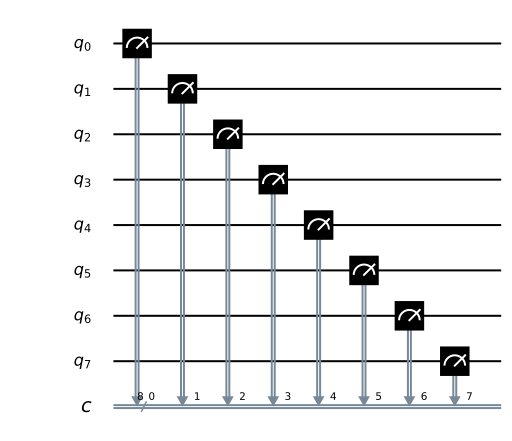

In [51]:
n = 8
n_q = 8
n_b = 8
qc_output = QuantumCircuit(n_q,n_b)

for j in range(n):
    qc_output.measure(j,j)

# plot configuration
qc_output.draw(output='mpl')


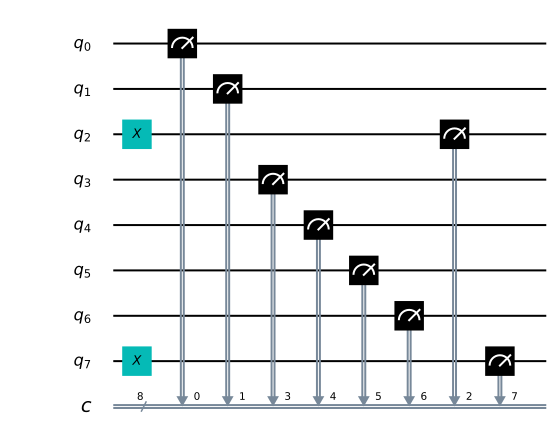

In [52]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7) 
qc_encode.x(2) 

qc = qc_encode + qc_output
qc.draw(output='mpl')



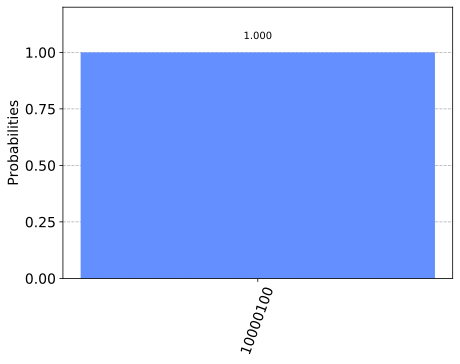

In [53]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7) 
qc_encode.x(2) 

qc = qc_encode + qc_output
qc.draw(output='mpl')

# simulate
# replace 'Aer.get_backend('qasm_simulator')' with another device if you want
# to use another one.

counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts() 

#plot the result
plot_histogram(counts)
# plt.subplots_adjust(bottom=0.25) 
# plt.savefig("test.svg") 
 

## Half Adder

In [54]:
ha = QuantumCircuit(4, 2)

# input
ha.x(0)
ha.x(1)
ha.barrier()

**CNOT**: `QuantumGates.cx(control, result)`, controlled not gate. Flip when the control is 1.

In [55]:
# XOR on bit 1
ha.cx(0, 2)
ha.cx(1, 2)

**Toffoli**: `QuantumGates.ccx(control1, control2, result)`, flip when both controls are 1.

In [56]:
ha.ccx(0, 1, 3)

Results:

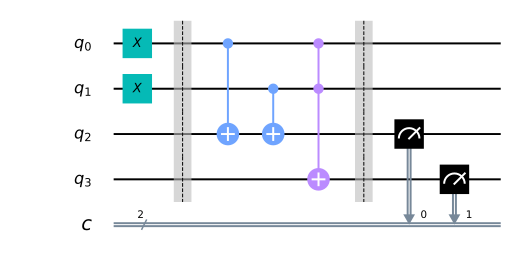

In [57]:
ha.barrier()

# output
ha.measure(2, 0)
ha.measure(3, 1)
ha.draw(output='mpl')

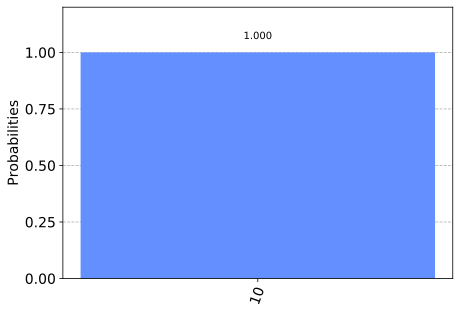

In [58]:
# simulate
counts = execute(ha, Aer.get_backend('qasm_simulator')).result().get_counts() 

# plot the result
plot_histogram(counts)